# **Fatter Challenge Project (Public Version)**

> **Note:** This notebook is a public version of work done for a university challenge project with Fatter company. All proprietary data has been removed and replaced with instructions for using synthetic data samples. The code structure and analysis methodology remain the same as the original project.

# **Installing required libraries**

- mysql-connector-python: This library provides a Python interface for connecting and interacting with MySQL databases. It allows you to establish connections to MySQL servers, execute SQL queries, and fetch results.

- folium: Folium is a Python library used for visualizing geospatial data. It builds on the capabilities of the Leaflet.js JavaScript library and allows you to create interactive maps directly in Python.

- plotly: Plotly is a data visualization library that allows you to create interactive and publication-quality plots and charts.

In [1]:
# Install required packages
!pip install mysql-connector-python
!pip install folium pandas
!pip install plotly
!pip install geopandas

  Obtaining dependency information for mysql-connector-python from https://files.pythonhosted.org/packages/ec/55/63567fa4082aa22bad5cecaf16fe3604f026aea40b06d0bf2a9fd75212ff/mysql_connector_python-9.3.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.4 MB 435.7 kB/s eta 0:00:38
   ---------------------------------------- 0.1/16.4 MB 1.1 MB/s eta 0:00:15
   - -------------------------------------- 0.4/16.4 MB 3.1 MB/s eta 0:00:06
   -- ------------------------------------- 1.0/16.4 MB 5.3 MB/s eta 0:00:03
   --- ------------------------------------ 1.6/16.4 MB 6.8 MB/s eta 0:00:03
   ---- ----------------------------------- 1.7/16.4 MB 7.2 MB/s eta 0:00:03
   ---- ----------------------------------- 1.7/16.4 MB 7.2 MB/s eta 0:00:03
   ------- -------------------------------- 2.9/16.4 MB 7.6 MB/s eta 0:00:02
   -

# **Required libraries**

In [2]:
import pandas as pd
import mysql.connector
from mysql.connector import Error
import folium
import geopandas as gpd
import numpy as np
import os
import json

# **Data Handling Options**

This notebook can work with data in two ways:

1. **Option 1: Using CSV files** (Recommended for public sharing)
2. **Option 2: Using a MySQL database** (Original method, requires database access)

For public sharing and GitHub, use Option 1 with sample data.

## **Option 1: Load data from CSV files (for public sharing)**

In [3]:
# Create sample_data directory if it doesn't exist
os.makedirs('sample_data', exist_ok=True)

# Sample store data generation
def create_sample_stores_data():
    # Create synthetic store data
    np.random.seed(42)
    n_stores = 50
    
    stores_data = {
        'Cod3HD': np.arange(1, n_stores+1),
        'Insegna': np.random.choice(['Store A', 'Store B', 'Store C', 'Store D'], n_stores),
        'TipologiaPdV': np.random.choice(['Type 1', 'Type 2', 'Type 3'], n_stores),
        'MQVEND': np.random.uniform(50, 500, n_stores),
        'Parking': np.random.choice(['Yes', 'No'], n_stores),
        'Indirizzo': [f"Address {i}" for i in range(1, n_stores+1)],
        'Lats': np.random.uniform(41.8, 42.0, n_stores),  # Sample coordinates for Rome area
        'Longs': np.random.uniform(12.4, 12.6, n_stores),
        'Comune': np.random.choice(['Roma', 'Milano', 'Napoli', 'Torino'], n_stores),
        'Potenziale': np.random.uniform(1000, 10000, n_stores)
    }
    
    stores_df = pd.DataFrame(stores_data)
    stores_df.to_csv('sample_data/stores_sample.csv', index=False)
    return stores_df

# Sample sociodemographic data generation
def create_sample_sociodemographic_data():
    np.random.seed(43)
    n_districts = 20
    
    sociodemographic_data = {
        'microcode': np.arange(1, n_districts+1),
        'district': [f"District {i}" for i in range(1, n_districts+1)],
        'population': np.random.randint(5000, 50000, n_districts),
        'population_m': np.random.randint(2000, 25000, n_districts),
        'population_f': np.random.randint(2000, 25000, n_districts),
        'population_age_00_04_yr': np.random.randint(200, 2000, n_districts),
        'population_age_05_14_yr': np.random.randint(500, 5000, n_districts),
        'population_age_15_34_yr': np.random.randint(1000, 10000, n_districts),
        'population_age_35_44_yr': np.random.randint(1000, 10000, n_districts),
        'population_age_45_54_yr': np.random.randint(1000, 10000, n_districts),
        'population_age_55_64_yr': np.random.randint(500, 5000, n_districts),
        'population_age_65_up_yr': np.random.randint(500, 5000, n_districts)
    }
    
    sociodemographic_df = pd.DataFrame(sociodemographic_data)
    sociodemographic_df.to_csv('sample_data/sociodemographic_sample.csv', index=False)
    return sociodemographic_df

# Generate simple polygon data for each microcode district
def create_sample_shapes_data():
    from shapely.geometry import Polygon
    import random
    
    np.random.seed(44)
    n_districts = 20
    
    shapes_data = []
    
    # Generate simple polygons for each district
    base_lat, base_lon = 41.9, 12.5
    
    for i in range(1, n_districts+1):
        # Create a simple polygon around a center point with some randomness
        center_lat = base_lat + random.uniform(-0.1, 0.1)
        center_lon = base_lon + random.uniform(-0.1, 0.1)
        
        # Generate vertices for polygon
        vertices = []
        for angle in range(0, 360, 60):  # A hexagon
            dist = random.uniform(0.005, 0.015)
            lat = center_lat + dist * np.sin(np.radians(angle))
            lon = center_lon + dist * np.cos(np.radians(angle))
            vertices.append((lon, lat))
        
        # Close the polygon
        vertices.append(vertices[0])
        
        # Create a Polygon
        poly = Polygon(vertices)
        
        shapes_data.append({
            'microcode': i,
            'geometry': poly
        })
    
    # Create GeoDataFrame
    shapes_gdf = gpd.GeoDataFrame(shapes_data, geometry='geometry')
    
    # Save to GeoJSON file
    shapes_gdf.to_file('sample_data/shapes_sample.geojson', driver='GeoJSON')
    return shapes_gdf

# Generate and save sample data if it doesn't exist
if not os.path.exists('sample_data/stores_sample.csv'):
    print("Generating sample data files...")
    stores_df = create_sample_stores_data()
    sociodemo_df = create_sample_sociodemographic_data()
    shapes_df = create_sample_shapes_data()
    print("Sample data files created successfully.")
else:
    # Load the sample data
    stores_df = pd.read_csv('sample_data/stores_sample.csv')
    sociodemo_df = pd.read_csv('sample_data/sociodemographic_sample.csv')
    shapes_df = gpd.read_file('sample_data/shapes_sample.geojson')

print("Sample data loaded successfully.")

Generating sample data files...
Sample data files created successfully.
Sample data loaded successfully.


c:\Users\parha\anaconda3\Lib\site-packages\pyogrio\geopandas.py:710: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(


## **Option 2: MySQL Database Connection (Original Method)**

> **Note: This section requires access to the original database and is included for reference only.**
> **For public sharing on GitHub, use Option 1 above with the generated sample data.**

In [4]:
class MySQLDatabase:
    def __init__(self, host, database, user, password, port):
        self.host = host
        self.database = database
        self.user = user
        self.password = password
        self.port = port
        self.connection = None

    def connect(self):
        """Establish a database connection."""
        try:
            self.connection = mysql.connector.connect(
                host=self.host,
                database=self.database,
                user=self.user,
                password=self.password,
                port=self.port
            )
            if self.connection.is_connected():
                db_info = self.connection.get_server_info()
                print(f"Successfully connected to MySQL Server version {db_info}")
        except Error as e:
            print(f"Error: '{e}'")

    def disconnect(self):
        """Close the database connection."""
        if self.connection.is_connected():
            self.connection.close()
            print("MySQL connection is closed")

    def execute_query(self, query, params=None):
        """
        Execute a given SQL command, which could be a SELECT, INSERT, UPDATE, or DELETE command.
        """
        try:
            self.connect()
            cursor = self.connection.cursor(dictionary=True)  # Use dictionary cursor
            if params:
                cursor.execute(query, params)
            else:
                cursor.execute(query)
            if query.strip().lower().startswith("select"):
                result = cursor.fetchall()
                df = pd.DataFrame(result)
                return df
            else:
                self.connection.commit()
                return cursor.lastrowid
        except Error as e:
            print(f"Error: '{e}'")
        finally:
            if self.connection.is_connected():
                cursor.close()
                self.disconnect()

    def execute_many(self, query, val):
        """
        Execute a SQL command with multiple values (useful for INSERT statements with multiple rows).
        """
        try:
            self.connect()
            cursor = self.connection.cursor()
            cursor.executemany(query, val)
            self.connection.commit()
            print(cursor.rowcount, "record(s) inserted.")
        except Error as e:
            print(f"Error: '{e}'")
        finally:
            if self.connection.is_connected():
                cursor.close()
                self.disconnect()

# NOTE: For public sharing, DO NOT include actual database credentials
# To use with a real database, replace with your credentials:
"""
db_info = {
    "host": "your_host",
    "database": "your_database",
    "user": "your_username",
    "password": "your_password",
    "port": your_port
}

db = MySQLDatabase(**db_info)
select_stores_query = "SELECT  `Cod3HD`, `Insegna`, `TipologiaPdV`, `MQVEND`, `Parking`, `Indirizzo`, `Lats`, `Longs`, `Comune`, `Potenziale` FROM stores"
stores_df = db.execute_query(select_stores_query)
"""

'\ndb_info = {\n    "host": "your_host",\n    "database": "your_database",\n    "user": "your_username",\n    "password": "your_password",\n    "port": your_port\n}\n\ndb = MySQLDatabase(**db_info)\nselect_stores_query = "SELECT  `Cod3HD`, `Insegna`, `TipologiaPdV`, `MQVEND`, `Parking`, `Indirizzo`, `Lats`, `Longs`, `Comune`, `Potenziale` FROM stores"\nstores_df = db.execute_query(select_stores_query)\n'

# **Working with stores data**

### **Checking data types**

In [5]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cod3HD        50 non-null     int32  
 1   Insegna       50 non-null     object 
 2   TipologiaPdV  50 non-null     object 
 3   MQVEND        50 non-null     float64
 4   Parking       50 non-null     object 
 5   Indirizzo     50 non-null     object 
 6   Lats          50 non-null     float64
 7   Longs         50 non-null     float64
 8   Comune        50 non-null     object 
 9   Potenziale    50 non-null     float64
dtypes: float64(4), int32(1), object(5)
memory usage: 3.8+ KB


### **Modifying data types if needed**

In [6]:
# Ensure proper data types
stores_df = stores_df.astype({
    'Cod3HD': int,
    'Insegna': str,
    'TipologiaPdV': str,
    'MQVEND': float,
    'Parking': str,
    'Indirizzo': str,
    'Lats': float,
    'Longs': float,
    'Comune': str,
    'Potenziale': float,
})
stores_df

,Cod3HD,Insegna,TipologiaPdV,MQVEND,Parking,Indirizzo,Lats,Longs,Comune,Potenziale
0,1,Store C,Type 3,224.904780,Yes,Address 1,41.864641,12.531997,Roma,6535.065040
1,2,Store D,Type 2,172.107064,Yes,Address 2,41.903758,12.563444,Torino,9910.484651
2,3,Store A,Type 3,422.931879,No,Address 3,41.940604,12.511040,Napoli,2260.756137
3,4,Store C,Type 3,210.538997,No,Address 4,41.872726,12.505930,Torino,5664.966871
4,5,Store C,Type 1,176.420529,No,Address 5,41.994356,12.448370,Napoli,8896.357647
5,6,Store D,Type 3,294.213237,No,Address 6,41.992489,12.418621,Torino,7666.917560
6,7,Store A,Type 1,113.415901,Yes,Address 7,41.850356,12.579443,Roma,7273.141669
7,8,Store A,Type 3,410.988641,No,Address 8,41.899450,12.580084,Torino,7322.356756
8,9,Store C,Type 3,83.547790,Yes,Address 9,41.860176,12.526620,Roma,4235.420361
9,10,Store B,Type 1,494.099121,Yes,Address 10,41.856968,12.467806,Torino,3642.326598


### **Calculating fundamental statistics**

In [7]:
stores_df.describe()

,Cod3HD,MQVEND,Lats,Longs,Potenziale
count,50.00000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,257.786288,41.892876,12.503695,5761.465298
std,14.57738,129.171251,0.057494,0.056014,2495.588398
min,1.00000,52.484953,41.803318,12.401012,1274.502249
25%,13.25000,155.264757,41.848037,12.449859,3940.445295
50%,25.50000,252.445087,41.887619,12.514521,5874.758903
75%,37.75000,378.255392,41.935241,12.544502,7864.185873
max,50.00000,494.099121,41.997130,12.594602,9910.484651


### **Visualizing stores locations on map**

In [8]:
# Create a map centered at the mean of store locations
mymap = folium.Map(location=[stores_df['Lats'].mean(), stores_df['Longs'].mean()], zoom_start=10)

# Add markers for each store
for index, row in stores_df.iterrows():
    folium.Marker([row['Lats'], row['Longs']], 
                 popup=f"Store: {row['Insegna']}<br>Type: {row['TipologiaPdV']}<br>Potential: {row['Potenziale']}").add_to(mymap)

# Save the map to an HTML file
mymap.save('visualizations/stores_map.html')
mymap

# **Working with sociodemographic data**

In [9]:
# Display sociodemographic data
sociodemo_df.info()
sociodemo_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   microcode                20 non-null     int32 
 1   district                 20 non-null     object
 2   population               20 non-null     int32 
 3   population_m             20 non-null     int32 
 4   population_f             20 non-null     int32 
 5   population_age_00_04_yr  20 non-null     int32 
 6   population_age_05_14_yr  20 non-null     int32 
 7   population_age_15_34_yr  20 non-null     int32 
 8   population_age_35_44_yr  20 non-null     int32 
 9   population_age_45_54_yr  20 non-null     int32 
 10  population_age_55_64_yr  20 non-null     int32 
 11  population_age_65_up_yr  20 non-null     int32 
dtypes: int32(11), object(1)
memory usage: 1.1+ KB


,microcode,district,population,population_m,population_f,population_age_00_04_yr,population_age_05_14_yr,population_age_15_34_yr,population_age_35_44_yr,population_age_45_54_yr,population_age_55_64_yr,population_age_65_up_yr
0,1,District 1,19148,12480,22598,1486,1075,9604,3094,1665,1146,1605
1,2,District 2,24776,15016,14026,1605,3953,9661,4962,8196,684,1180
2,3,District 3,45753,24268,16037,884,2453,5714,1753,3275,2773,1445
3,4,District 4,23448,12927,7653,1567,3252,5504,6043,5639,1017,3332
4,5,District 5,30233,6810,18616,1516,4088,2110,4862,9416,2677,610


In [10]:
# Calculate basic statistics
sociodemo_df.describe()

,microcode,population,population_m,population_f,population_age_00_04_yr,population_age_05_14_yr,population_age_15_34_yr,population_age_35_44_yr,population_age_45_54_yr,population_age_55_64_yr,population_age_65_up_yr
count,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,10.50000,31005.000000,14288.350000,14441.050000,1169.950000,2915.150000,5976.400000,5487.200000,5078.600000,2968.000000,2446.100000
std,5.91608,13917.244366,6258.549902,6261.854152,460.738592,1370.060478,2393.766849,2170.373303,2928.964868,1384.976838,1344.159213
min,1.00000,5379.000000,4539.000000,3170.000000,398.000000,864.000000,1591.000000,1753.000000,1252.000000,684.000000,525.000000
25%,5.75000,22916.500000,9343.000000,9039.500000,832.250000,1671.250000,4888.250000,4444.500000,3110.250000,1919.500000,1354.250000
50%,10.50000,31963.000000,14088.500000,15031.500000,1285.500000,2816.000000,6244.000000,4912.000000,4140.500000,3176.500000,2462.500000
75%,15.25000,43668.250000,19007.750000,19586.000000,1528.750000,4157.250000,7519.750000,6542.500000,8206.500000,4184.250000,3552.750000
max,20.00000,49927.000000,24268.000000,22598.000000,1942.000000,4793.000000,9661.000000,9308.000000,9893.000000,4662.000000,4473.000000


# **Working with geographic shapes data**

### **Checking shape data types**

In [11]:
shapes_df.info()
shapes_df.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   microcode  20 non-null     int64   
 1   geometry   20 non-null     geometry
dtypes: geometry(1), int64(1)
memory usage: 452.0 bytes


,microcode,geometry
0,1,"POLYGON ((12.43213 41.90838, 12.42701 41.91278..."
1,2,"POLYGON ((12.45245 41.87201, 12.45162 41.87924..."
2,3,"POLYGON ((12.56663 41.81915, 12.56483 41.82609..."
3,4,"POLYGON ((12.54487 41.80873, 12.54523 41.81883..."
4,5,"POLYGON ((12.47256 41.91969, 12.46464 41.92978..."


### **Visualizing polygons on map**

In [12]:
# Create map centered around the mean of all polygons
pols = folium.Map(location=[shapes_df.geometry.centroid.y.mean(),
                          shapes_df.geometry.centroid.x.mean()],
               zoom_start=12)

# Add polygons to the map
for i, row in shapes_df.iterrows():
    folium.GeoJson(row['geometry'].__geo_interface__,
                  tooltip=f"Microcode: {row['microcode']}",
                  style_function=lambda x: {'fillColor': '#ffaf00',
                                           'color': 'black',
                                           'weight': 1,
                                           'fillOpacity': 0.3}).add_to(pols)

# Save the map
pols.save('visualizations/districts_map.html')
pols

### **Attributing each store to its dedicated microcode**

In [13]:
# Create geodataframes from the dataframes
stores_gdf = gpd.GeoDataFrame(
    stores_df, 
    geometry=gpd.points_from_xy(stores_df.Longs, stores_df.Lats)
)

# If shapes_df isn't already a GeoDataFrame (from Option 1)
if not isinstance(shapes_df, gpd.GeoDataFrame):
    shapes_gdf = gpd.GeoDataFrame(shapes_df, geometry='geometry')
else:
    shapes_gdf = shapes_df

# Ensure both GeoDataFrames have the same CRS
stores_gdf.crs = "EPSG:4326"
if shapes_gdf.crs is None:
    shapes_gdf.crs = "EPSG:4326"

# Perform spatial join
stores_with_microcodes = gpd.sjoin(stores_gdf, shapes_gdf, how='inner', predicate='within')

# Display results
stores_with_microcodes[['Insegna','Cod3HD', 'microcode','Potenziale']]

,Insegna,Cod3HD,microcode,Potenziale
3,Store C,4,16,5664.966871
13,Store C,14,15,9219.164973
15,Store A,16,12,5513.646652
25,Store B,26,16,1323.480464
27,Store B,28,11,5883.801712
29,Store D,30,4,6317.499345
35,Store A,36,11,5700.189340
48,Store B,49,18,8156.675753
48,Store B,49,20,8156.675753


### **Calculating statistics per microcode**

In [14]:
# Count number of stores per microcode
stores_per_microcode = stores_with_microcodes.groupby('microcode')['Potenziale'].count().reset_index()
stores_per_microcode.columns = ['microcode', 'store_count']
stores_per_microcode

,microcode,store_count
0,4,1
1,11,2
2,12,1
3,15,1
4,16,2
5,18,1
6,20,1


In [15]:
# Calculate sum of potential per microcode
sum_potenziale = stores_with_microcodes.groupby('microcode')['Potenziale'].sum().reset_index()
sum_potenziale.columns = ['microcode', 'total_potenziale']
sum_potenziale

,microcode,total_potenziale
0,4,6317.499345
1,11,11583.991053
2,12,5513.646652
3,15,9219.164973
4,16,6988.447335
5,18,8156.675753
6,20,8156.675753


# **Visualizing Combined Analysis**

In [16]:
# Merge the sociodemographic data with the potential data by microcode
combined_data = pd.merge(sociodemo_df, sum_potenziale, on='microcode', how='left')
combined_data['total_potenziale'] = combined_data['total_potenziale'].fillna(0)

# Calculate potential per capita
combined_data['potenziale_per_capita'] = combined_data['total_potenziale'] / combined_data['population']
combined_data['potenziale_per_capita'] = combined_data['potenziale_per_capita'].fillna(0)

# Display the combined data
combined_data.head()

,microcode,district,population,population_m,population_f,population_age_00_04_yr,population_age_05_14_yr,population_age_15_34_yr,population_age_35_44_yr,population_age_45_54_yr,population_age_55_64_yr,population_age_65_up_yr,total_potenziale,potenziale_per_capita
0,1,District 1,19148,12480,22598,1486,1075,9604,3094,1665,1146,1605,0.000000,0.000000
1,2,District 2,24776,15016,14026,1605,3953,9661,4962,8196,684,1180,0.000000,0.000000
2,3,District 3,45753,24268,16037,884,2453,5714,1753,3275,2773,1445,0.000000,0.000000
3,4,District 4,23448,12927,7653,1567,3252,5504,6043,5639,1017,3332,6317.499345,0.269426
4,5,District 5,30233,6810,18616,1516,4088,2110,4862,9416,2677,610,0.000000,0.000000


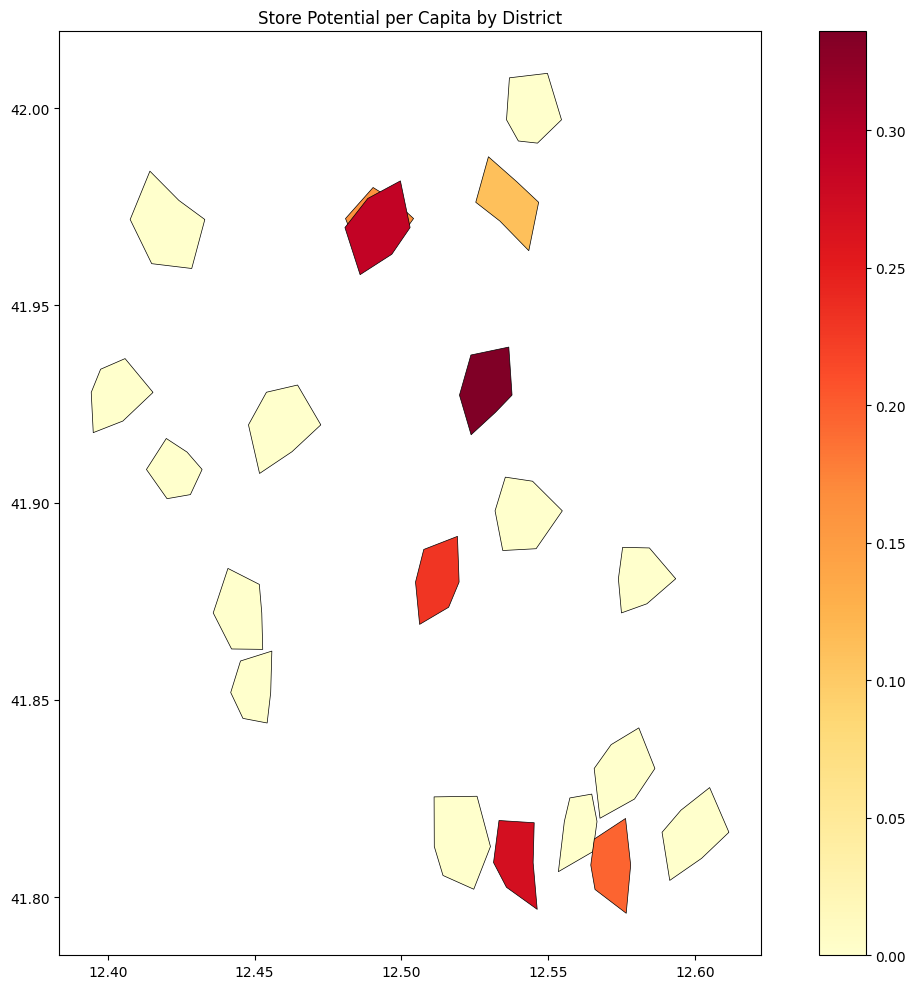

In [17]:
# Create choropleth map of potential per capita
# Merge shape data with combined data
merged_gdf = shapes_gdf.merge(combined_data, on='microcode')

# Create the map
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged_gdf.plot(column='potenziale_per_capita', ax=ax, legend=True, cmap='YlOrRd', 
                edgecolor='black', linewidth=0.5)
ax.set_title('Store Potential per Capita by District')
plt.tight_layout()

# Save the figure
plt.savefig('visualizations/potential_per_capita.png', dpi=300, bbox_inches='tight')
plt.show()

# **Conclusion**

This notebook demonstrates the analysis methodology used in the Fatter Challenge project. The original analysis used proprietary data from Fatter company, but this public version uses synthetic data to demonstrate the techniques and approach.

The analysis included:
1. Loading and cleaning store location data
2. Analyzing sociodemographic information by district
3. Using geospatial analysis to map stores to districts
4. Calculating performance metrics by district
5. Visualizing the results using maps and charts

The full project included additional analyses and recommendations based on the proprietary data.